# BASAVARAJ HJ (Task 2- Explore Supervised Machine Learning)

# Data:  

###### Given number of hours a student have studied and their respective scores.

# Objective:

###### To predict the percentage of marks that a student is expected to score based upon the number of hours they studied 

## Dataset:

http://bit.ly/w-data

In [6]:
# Importing all libraries required in this notebook
import pandas as pd
import statistics as st
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from scipy import stats

In [7]:
# Reading the data
data= pd.read_csv('student_scores - student_scores.csv')

In [8]:
print(data)
print("Data Readed Succesfully")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Data Readed Succesfully


# Basic statistics of the dataset

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### The mean hours of study is 5 hours and mean percentage score is 51.48%

In [10]:
corr=data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data visualization

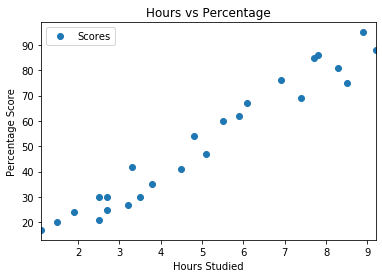

In [11]:
# Plotting the Hours vs. Scores scatter plot
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###### Above graphes shows that percentage score and hours studied are linear 

## Preparing the data

In [12]:
# Dividing the data into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [13]:
# Splitting this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Training the Model Algorithm

In [14]:
# Using train dataset to fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
print('Training Successful')

Training Successful


#### Plotting the regression line

y=ax+b



<function matplotlib.pyplot.show(*args, **kw)>

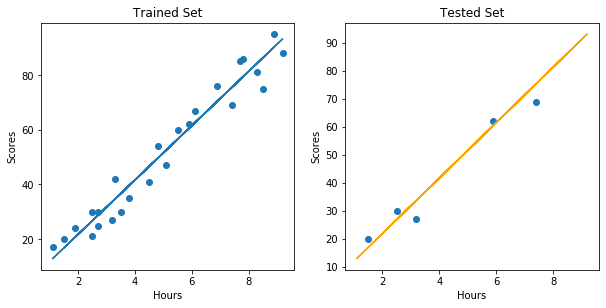

In [15]:
# Plotting for the trained and tested data
fig = plt.figure(figsize =(10,10))
mx1 = plt.subplot(221)
mx2 = plt.subplot(222)

line = model.coef_*X+model.intercept_

mx1.scatter(X,y)
mx1.plot(X,line)
plt.show
mx1.set_title('Trained Set')
mx1.set_xlabel('Hours')
mx1.set_ylabel('Scores')

mx2.scatter(X_test, y_test)
mx2.plot(X_train, model.predict(X_train), c="orange")
mx2.set_title('Tested Set')
mx2.set_xlabel('Hours')
mx2.set_ylabel('Scores')
plt.show

## Model Predictions

In [16]:
#Comapring Observed and Predicted values
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

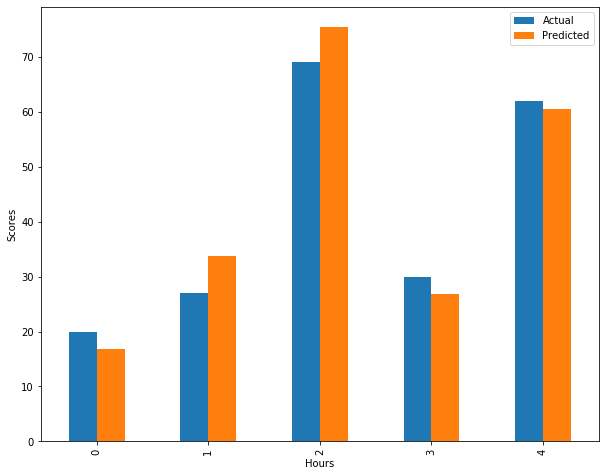

In [17]:
# Plotting the prediction with actual values
df.plot(kind = 'bar', figsize=(10,8))
plt.xlabel('Hours')  
plt.ylabel('Scores')  

### Predicting own score of a student according to the hours studied

In [18]:
hours = float(input('Enter the no. of hours:'))
pred_own_score = model.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_own_score[0]))

Enter the no. of hours:2.5
Number of Hours = 2.5
Predicted Score = 26.794801243040276


# Evaluating the Model Performance

Using  method:
R-square


In [19]:
#R-square value
slope , intercept, r, p, std_err = stats.linregress(y_test, y_pred)
print('R-Squared error:',r)

R-Squared error: 0.9806835759589493


###### r2 score is 0.98  which means 98%of our data fits the model